In [1]:
from google.colab import files
files.upload()  # Upload your kaggle.json file


Saving kaggle .json to kaggle .json


{'kaggle .json': b'{"username":"collinsonsombi","key":"bd78f752a547012d98b3147071d187ec"}'}

In [3]:
import os
os.makedirs("/root/.kaggle", exist_ok=True)
os.rename("kaggle .json", "/root/.kaggle/kaggle.json")  # Fixing the space in filename
os.chmod("/root/.kaggle/kaggle.json", 600)


In [4]:
# Download dataset using Kaggle API
!kaggle datasets download -d mostafaabla/garbage-classification

Dataset URL: https://www.kaggle.com/datasets/mostafaabla/garbage-classification
License(s): ODbL-1.0
 93% 222M/239M [00:00<00:00, 419MB/s]
100% 239M/239M [00:00<00:00, 444MB/s]


In [5]:
#  Unzip the dataset
import zipfile
with zipfile.ZipFile("garbage-classification.zip", "r") as zip_ref:
    zip_ref.extractall("garbage_data")

In [6]:
#  Confirm data folders
print("Folders inside 'garbage_data':", os.listdir("garbage_data"))

Folders inside 'garbage_data': ['garbage_classification']


In [12]:
##Set Up Data Generators for Training

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths
data_dir = "garbage_data/garbage_classification"

# Image size and batch size
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

# Create data generators with validation split
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 12415 images belonging to 12 classes.
Found 3100 images belonging to 12 classes.


In [9]:
#Building the CNN model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │         1,548 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,393,868 (28.21 MB)

 Trainable params: 7,393,868 (28.21 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
#Training the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 357s 911ms/step - accuracy: 0.4194 - loss: 2.0249 - val_accuracy: 0.5958 - val_loss: 1.2582
Epoch 2/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 336s 867ms/step - accuracy: 0.6015 - loss: 1.1912 - val_accuracy: 0.6358 - val_loss: 1.0918
Epoch 3/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 347s 893ms/step - accuracy: 0.6868 - loss: 0.9694 - val_accuracy: 0.6668 - val_loss: 1.0051
Epoch 4/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 372s 868ms/step - accuracy: 0.7330 - loss: 0.7947 - val_accuracy: 0.6368 - val_loss: 1.1012
Epoch 5/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 343s 883ms/step - accuracy: 0.7762 - loss: 0.6683 - val_accuracy: 0.6639 - val_loss: 1.0759
Epoch 6/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 346s 892ms/step - accuracy: 0.8039 - loss: 0.5753 - val_accuracy: 0.6829 - val_loss: 1.0876
Epoch 7/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 338s 871ms/step - accuracy: 0.8439 - loss: 0.4641 - val_accuracy: 0.6861 - val_loss: 1.0925
Epoch 8/10
388/388 ━━━━━━━━━━━━━━━━━━━━ 339s 873ms/step - accuracy: 0.8622 -

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


97/97 ━━━━━━━━━━━━━━━━━━━━ 23s 238ms/step

📊 Classification Report:
              precision    recall  f1-score   support

     battery      0.504     0.614     0.554       189
  biological      0.652     0.609     0.630       197
 brown-glass      0.730     0.537     0.619       121
   cardboard      0.730     0.652     0.688       178
     clothes      0.862     0.931     0.895      1065
 green-glass      0.840     0.672     0.747       125
       metal      0.370     0.392     0.381       153
       paper      0.492     0.595     0.539       210
     plastic      0.435     0.486     0.459       173
       shoes      0.653     0.676     0.664       395
       trash      0.770     0.626     0.690       139
 white-glass      0.404     0.148     0.217       155

    accuracy                          0.690      3100
   macro avg      0.620     0.578     0.590      3100
weighted avg      0.686     0.690     0.682      3100



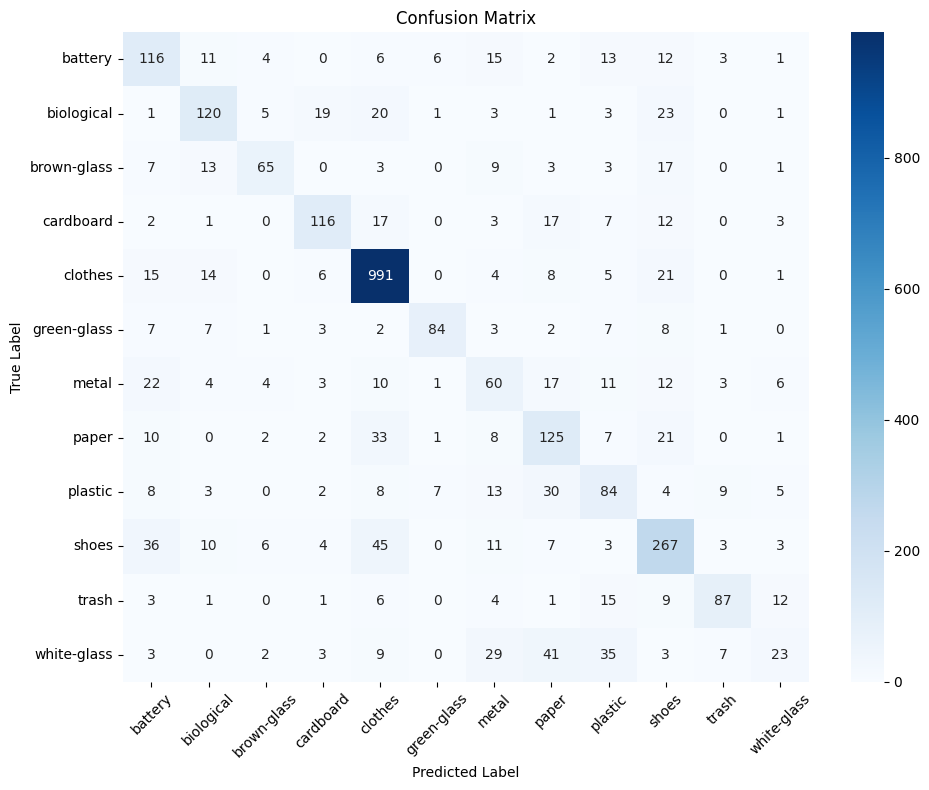

In [13]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Predict on validation data
val_generator.reset()  # Ensure generator index is at zero
pred_probs = model.predict(val_generator, verbose=1)
pred_classes = np.argmax(pred_probs, axis=1)

# Step 2: True labels
true_classes = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

# Step 3: Classification Report
print("\n📊 Classification Report:")
report = classification_report(true_classes, pred_classes, target_names=class_labels, digits=3)
print(report)

# Step 4: Confusion Matrix
conf_matrix = confusion_matrix(true_classes, pred_classes)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [19]:
# Save in .h5 format
model.save('my_model.h5')  # Works with load_model


In [20]:
# Load the .h5 model
model = tf.keras.models.load_model('my_model.h5')

# Convert to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model
with open('garbage_model.tflite', 'wb') as f:
    f.write(tflite_model)



Saved artifact at '/tmp/tmpb6_nyr1i'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 12), dtype=tf.float32, name=None)
Captures:
  132274362029968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132274362029008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132274618710352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132274362029392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132274362029776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132274362027856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132274362025744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132274362025936: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [22]:
##done